In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('drug_consumtion.data')

In [3]:
df.head()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [4]:
# df.gender = df.gender.apply(lambda x: 0 if x < 0 else 1)  # 1 - female, 0 - male

In [5]:
drugs_cols = [
    'alcohol',
    'amphet',
    'amyl',
    'benzos',
    'caff',
    'cannabis',
    'choc',
    'coke',
    'crack',
    'ecstasy',
    'heroin',
    'ketamine',
    'legalh',
    'lsd',
    'meth',
    'mushrooms',
    'nicotine',
    'semer',
    'vsa'
]

In [6]:
drug_mapping = {}
for drug in drugs_cols:
#     df[drug] = df[drug].apply(lambda x: 0 if x in ('CL0', 'CL1') else 1)
    df[drug], mapping = pd.factorize(df[drug])
    drug_mapping[drug] = mapping

In [7]:
# categories_mapping = {}
# for col in ['age', 'country', 'education', 'ethnicity']:
#     df[col], mapping = pd.factorize(df[col])
#     categories_mapping[col] = mapping

In [8]:
df.head()

,id,age,gender,education,country,ethnicity,nscore,escore,oscore,ascore,...,ecstasy,heroin,ketamine,legalh,lsd,meth,mushrooms,nicotine,semer,vsa
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,0,0,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,1,0,1,0,1,1,0,1,0,0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,1,2,0,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,1,0,0,0,0,0,0,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,2,0,0,1,0,0,2,0,0,0


In [9]:
drug_mapping

{'alcohol': Index(['CL5', 'CL6', 'CL4', 'CL2', 'CL1', 'CL0', 'CL3'], dtype='object'),
 'amphet': Index(['CL2', 'CL0', 'CL1', 'CL3', 'CL5', 'CL4', 'CL6'], dtype='object'),
 'amyl': Index(['CL0', 'CL2', 'CL1', 'CL3', 'CL5', 'CL4', 'CL6'], dtype='object'),
 'benzos': Index(['CL2', 'CL0', 'CL3', 'CL1', 'CL4', 'CL5', 'CL6'], dtype='object'),
 'caff': Index(['CL6', 'CL5', 'CL4', 'CL3', 'CL0', 'CL1', 'CL2'], dtype='object'),
 'cannabis': Index(['CL0', 'CL4', 'CL3', 'CL2', 'CL1', 'CL6', 'CL5'], dtype='object'),
 'choc': Index(['CL5', 'CL6', 'CL4', 'CL0', 'CL3', 'CL2', 'CL1'], dtype='object'),
 'coke': Index(['CL0', 'CL3', 'CL2', 'CL1', 'CL6', 'CL5', 'CL4'], dtype='object'),
 'crack': Index(['CL0', 'CL1', 'CL2', 'CL3', 'CL5', 'CL4', 'CL6'], dtype='object'),
 'ecstasy': Index(['CL0', 'CL4', 'CL1', 'CL3', 'CL2', 'CL6', 'CL5'], dtype='object'),
 'heroin': Index(['CL0', 'CL1', 'CL2', 'CL3', 'CL5', 'CL6', 'CL4'], dtype='object'),
 'ketamine': Index(['CL0', 'CL2', 'CL3', 'CL1', 'CL5', 'CL4', 'CL6'], 

In [10]:
drug_count = df[drugs_cols].sum().sort_values(ascending=False)

In [11]:
drug_count

cannabis     5613
nicotine     5433
benzos       3290
amphet       3261
alcohol      2777
ecstasy      2632
legalh       2602
mushrooms    2238
coke         2153
lsd          2083
choc         1779
meth         1419
amyl         1127
vsa          1031
caff          967
ketamine      901
heroin        724
crack         561
semer          18
dtype: int64

In [12]:
df.to_csv('data.csv', index=False)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
y = df['cannabis']

In [15]:
for i in range(7):
    print("{}: {}".format(i, y[y==i].count()))

0: 413
1: 140
2: 211
3: 266
4: 207
5: 463
6: 185


In [16]:
x = df[['age', 'gender', 'education', 'country', 'ethnicity', 'nscore', 'escore', 'oscore', 'ascore', 'cscore', 'impulsive', 'ss']]
x.to_csv('data_cannabis.csv')

In [17]:
x = np.array(x)
y = np.array(y)

In [18]:
n_samples = x.shape[0]
n_train = int(n_samples * 0.7)
n_test = n_samples - n_train

In [19]:
perm = np.random.permutation(n_samples)
train_indx = perm[:n_train]
test_indx = perm[n_train:]

In [20]:
data_x_train, data_y_train = x[train_indx,:], y[train_indx]
data_x_test, data_y_test = x[test_indx,:], y[test_indx]
data_x_train = data_x_train.T
data_x_test = data_x_test.T

In [21]:
data_x_train.shape, data_x_test.shape

((12, 1319), (12, 566))

In [22]:
data_y_train.shape, data_y_test.shape

((1319,), (566,))

In [23]:
from mlp import MLP

In [24]:
# np.random.seed(42)

In [25]:
nn = MLP(input_dim=12, first_hid_dim=18, second_hid_dim=10, output_dim=7, batch_size=1319, learning_rate=1e-2)

In [26]:
def get_accuracy(predicted, true_value):
    return sum(true_value == predicted) / len(true_value)

In [27]:
number_of_iterations=500
stats = nn.train(data_x_train, data_y_train, data_x_test, data_y_test, number_of_iterations)

Epoch: 0, Loss: 10.84446959980823
Epoch: 50, Loss: 13.171283639624068
Epoch: 100, Loss: 13.650493088308604
Epoch: 150, Loss: 13.523857544680428
Epoch: 200, Loss: 7.550998947030563
Epoch: 250, Loss: 6.106960429052437
Epoch: 300, Loss: 3.6339195530247923
Epoch: 350, Loss: 1.9874053718685452
Epoch: 400, Loss: 1.945910149055314
Epoch: 450, Loss: 1.945910149055314


In [28]:
data_y_train_pred = nn.predict(data_x_train)
print("Train acc: {}".format(get_accuracy(data_y_train_pred, data_y_train)))

data_y_test_pred = nn.predict(data_x_test)
print("Test acc: {}".format(get_accuracy(data_y_test_pred, data_y_test)))

Train acc: 0.2175890826383624
Test acc: 0.1872791519434629


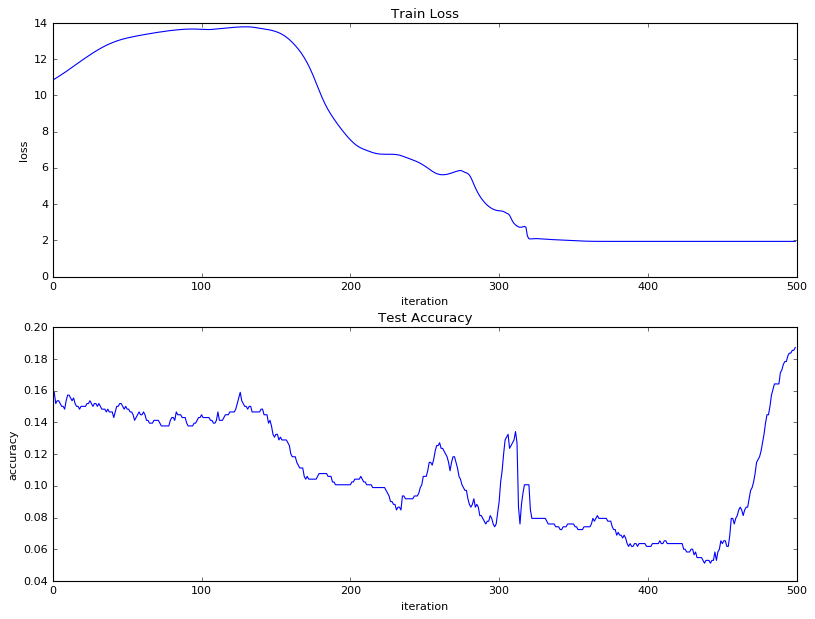

In [29]:
plt.figure(num=None, figsize=(12, 9), dpi=80, facecolor='w', edgecolor='k')
plt.subplot(211)
plt.title('Train Loss')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.plot(range(number_of_iterations), stats['loss'], 'b', label="loss")

plt.subplot(212)
plt.title('Test Accuracy')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.plot(range(number_of_iterations), stats['test_accuracy'], 'b', label="accuracy")